In [7]:
__version__ = '0.6.6'

from . import DE, GA, PSO, SA, ACA, AFSA, IA, tools


def start():
    print('''
    scikit-opt import successfully,
    version: {version}
    Author: Guo Fei,
    Email: guofei9987@foxmail.com
    repo: https://github.com/guofei9987/scikit-opt,
    documents: https://scikit-opt.github.io/
    '''.format(version=__version__))


ImportError: attempted relative import with no known parent package

In [8]:
import numpy as np

__all__ = ['crossover_1point', 'crossover_2point', 'crossover_2point_bit', 'crossover_pmx', 'crossover_2point_prob']


def crossover_1point(self):
    Chrom, size_pop, len_chrom = self.Chrom, self.size_pop, self.len_chrom
    for i in range(0, size_pop, 2):
        n = np.random.randint(0, self.len_chrom)
        # crossover at the point n
        seg1, seg2 = self.Chrom[i, n:].copy(), self.Chrom[i + 1, n:].copy()
        self.Chrom[i, n:], self.Chrom[i + 1, n:] = seg2, seg1
    return self.Chrom


def crossover_2point(self):
    Chrom, size_pop, len_chrom = self.Chrom, self.size_pop, self.len_chrom
    for i in range(0, size_pop, 2):
        n1, n2 = np.random.randint(0, self.len_chrom, 2)
        if n1 > n2:
            n1, n2 = n2, n1
        # crossover at the points n1 to n2
        seg1, seg2 = self.Chrom[i, n1:n2].copy(), self.Chrom[i + 1, n1:n2].copy()
        self.Chrom[i, n1:n2], self.Chrom[i + 1, n1:n2] = seg2, seg1
    return self.Chrom


def crossover_2point_bit(self):
    '''
    3 times faster than `crossover_2point`, but only use for 0/1 type of Chrom
    :param self:
    :return:
    '''
    Chrom, size_pop, len_chrom = self.Chrom, self.size_pop, self.len_chrom
    half_size_pop = int(size_pop / 2)
    Chrom1, Chrom2 = Chrom[:half_size_pop], Chrom[half_size_pop:]
    mask = np.zeros(shape=(half_size_pop, len_chrom), dtype=int)
    for i in range(half_size_pop):
        n1, n2 = np.random.randint(0, self.len_chrom, 2)
        if n1 > n2:
            n1, n2 = n2, n1
        mask[i, n1:n2] = 1
    mask2 = (Chrom1 ^ Chrom2) & mask
    Chrom1 ^= mask2
    Chrom2 ^= mask2
    return self.Chrom


def crossover_2point_prob(self, crossover_prob):
    '''
    2 points crossover with probability
    '''
    Chrom, size_pop, len_chrom = self.Chrom, self.size_pop, self.len_chrom
    for i in range(0, size_pop, 2):
        if np.random.rand() < crossover_prob:
            n1, n2 = np.random.randint(0, self.len_chrom, 2)
            if n1 > n2:
                n1, n2 = n2, n1
            seg1, seg2 = self.Chrom[i, n1:n2].copy(), self.Chrom[i + 1, n1:n2].copy()
            self.Chrom[i, n1:n2], self.Chrom[i + 1, n1:n2] = seg2, seg1
    return self.Chrom


# def crossover_rv_3(self):
#     Chrom, size_pop = self.Chrom, self.size_pop
#     i = np.random.randint(1, self.len_chrom)  # crossover at the point i
#     Chrom1 = np.concatenate([Chrom[::2, :i], Chrom[1::2, i:]], axis=1)
#     Chrom2 = np.concatenate([Chrom[1::2, :i], Chrom[0::2, i:]], axis=1)
#     self.Chrom = np.concatenate([Chrom1, Chrom2], axis=0)
#     return self.Chrom


def crossover_pmx(self):
    '''
    Executes a partially matched crossover (PMX) on Chrom.
    For more details see [Goldberg1985]_.

    :param self:
    :return:

    .. [Goldberg1985] Goldberg and Lingel, "Alleles, loci, and the traveling
   salesman problem", 1985.
    '''
    Chrom, size_pop, len_chrom = self.Chrom, self.size_pop, self.len_chrom
    for i in range(0, size_pop, 2):
        Chrom1, Chrom2 = self.Chrom[i], self.Chrom[i + 1]
        cxpoint1, cxpoint2 = np.random.randint(0, self.len_chrom - 1, 2)
        if cxpoint1 >= cxpoint2:
            cxpoint1, cxpoint2 = cxpoint2, cxpoint1 + 1
        # crossover at the point cxpoint1 to cxpoint2
        pos1_recorder = {value: idx for idx, value in enumerate(Chrom1)}
        pos2_recorder = {value: idx for idx, value in enumerate(Chrom2)}
        for j in range(cxpoint1, cxpoint2):
            value1, value2 = Chrom1[j], Chrom2[j]
            pos1, pos2 = pos1_recorder[value2], pos2_recorder[value1]
            Chrom1[j], Chrom1[pos1] = Chrom1[pos1], Chrom1[j]
            Chrom2[j], Chrom2[pos2] = Chrom2[pos2], Chrom2[j]
            pos1_recorder[value1], pos1_recorder[value2] = pos1, j
            pos2_recorder[value1], pos2_recorder[value2] = j, pos2

        self.Chrom[i], self.Chrom[i + 1] = Chrom1, Chrom2
    return self.Chrom


In [13]:
import unittest
# -*- coding: utf-8 -*-
# @Time    : 2019/10/15
# @Author  : github.com/Agrover112
from sko.demo_func import ackley, cigar, function_for_TSP, rastrigrin, rosenbrock, sixhumpcamel, sphere, schaffer, \
    zakharov, shubert, griewank, rastrigrin, rosenbrock, sixhumpcamel, zakharov, ackley, cigar


class TestDemoFunc(unittest.TestCase):

    def test_function_for_TSP(self):
        pass

    def test_sphere(self):
        self.assertEqual(sphere((0, 0)), 0.0, msg="sphere failed for 2 arguments")

    def test_schaffer(self):
        self.assertEqual(schaffer((0, 0)), 0.0, msg="schaffer failed for 2 arguments")

    def test_shubert(self):
        self.assertEqual(
            shubert((-7.08350643, -7.70831395)), -186.7309088309155, msg="shubert failed for 2 arguments")

    def test_griewank(self):
        self.assertEqual(griewank((0, 0)), 0.0, msg="griewank failed for 2 arguments ")
        self.assertEqual(griewank((0, 0, 0)), 0.0, msg="griewank failed for 3 arguments ")

    def test_rastrigrin(self):
        self.assertEqual(rastrigrin((0, 0)), 0.0, msg="rastrigrin failed for 2 arguments ")
        self.assertEqual(rastrigrin((0, 0, 0)), 0.0, msg="rastrigrin failed for 3 arguments ")

    def test_rosenbrock(self):
        self.assertEqual(rosenbrock((1, 1, 1)), 0.0, msg="rosenbrock failed for 3 arguments ")
        self.assertEqual(rosenbrock((1, 1)), 0.0, msg="rosenbrock failed for 2 arguments ")

    def test_zakharov(self):
        self.assertEqual(zakharov((0, 0)), 0.0, msg="zakharov failed for 2 arguments ")
        self.assertEqual(zakharov((0, 0, 0)), 0.0, msg="zakharov failed for 3 arguments ")

    def test_ackley(self):
        self.assertEqual(ackley((0, 0)), -200.0, msg="ackley failed for 2 arguments ")

    def test_cigar(self):
        self.assertEqual(cigar((0, 0)), 0.0, msg="cigar failed for 2 arguments ")
        self.assertEqual(cigar((0, 0, 0, 0)), 0.0, msg="cigar failed for 4 arguments ")

    def test_sixhumpcamel(self):
        self.assertEqual(sixhumpcamel(
            (-0.08984201368301331, 0.7126564032704135)), -1.0316284534898774,
            msg="sixhumpcamel failed for 2 arguments ")


if __name__ == '__main__':
    unittest.main(module=__name__)


usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument 'c:\\Users\\songy\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-20736ILh07Jfz6Ja4.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [4]:
from abc import ABCMeta, abstractmethod
import types
import warnings


class SkoBase(metaclass=ABCMeta):
    def register(self, operator_name, operator, *args, **kwargs):
        '''
        regeister udf to the class
        :param operator_name: string
        :param operator: a function, operator itself
        :param args: arg of operator
        :param kwargs: kwargs of operator
        :return:
        '''

        def operator_wapper(*wrapper_args):
            return operator(*(wrapper_args + args), **kwargs)

        setattr(self, operator_name, types.MethodType(operator_wapper, self))
        return self

    def fit(self, *args, **kwargs):
        warnings.warn('.fit() will be deprecated in the future. use .run() instead.'
                      , DeprecationWarning)
        return self.run(*args, **kwargs)


class Problem(object):
    pass

In [5]:
import numpy as np


def ranking(self):
    # GA select the biggest one, but we want to minimize func, so we put a negative here
    self.FitV = -self.Y


def ranking_linear(self):
    '''
    For more details see [Baker1985]_.

    :param self:
    :return:

    .. [Baker1985] Baker J E, "Adaptive selection methods for genetic
    algorithms, 1985.
    '''
    self.FitV = np.argsort(np.argsort(-self.Y))
    return self.FitV


In [14]:
import numpy as np


def mutation(self):
    '''
    mutation of 0/1 type chromosome
    faster than `self.Chrom = (mask + self.Chrom) % 2`
    :param self:
    :return:
    '''
    #
    mask = (np.random.rand(self.size_pop, self.len_chrom) < self.prob_mut)
    self.Chrom ^= mask
    return self.Chrom


def mutation_TSP_1(self):
    '''
    every gene in every chromosome mutate
    :param self:
    :return:
    '''
    for i in range(self.size_pop):
        for j in range(self.n_dim):
            if np.random.rand() < self.prob_mut:
                n = np.random.randint(0, self.len_chrom, 1)
                self.Chrom[i, j], self.Chrom[i, n] = self.Chrom[i, n], self.Chrom[i, j]
    return self.Chrom


def swap(individual):
    n1, n2 = np.random.randint(0, individual.shape[0] - 1, 2)
    if n1 >= n2:
        n1, n2 = n2, n1 + 1
    individual[n1], individual[n2] = individual[n2], individual[n1]
    return individual


def reverse(individual):
    '''
    Reverse n1 to n2
    Also called `2-Opt`: removes two random edges, reconnecting them so they cross
    Karan Bhatia, "Genetic Algorithms and the Traveling Salesman Problem", 1994
    https://pdfs.semanticscholar.org/c5dd/3d8e97202f07f2e337a791c3bf81cd0bbb13.pdf
    '''
    n1, n2 = np.random.randint(0, individual.shape[0] - 1, 2)
    if n1 >= n2:
        n1, n2 = n2, n1 + 1
    individual[n1:n2] = individual[n1:n2][::-1]
    return individual


def transpose(individual):
    # randomly generate n1 < n2 < n3. Notice: not equal
    n1, n2, n3 = sorted(np.random.randint(0, individual.shape[0] - 2, 3))
    n2 += 1
    n3 += 2
    slice1, slice2, slice3, slice4 = individual[0:n1], individual[n1:n2], individual[n2:n3 + 1], individual[n3 + 1:]
    individual = np.concatenate([slice1, slice3, slice2, slice4])
    return individual


def mutation_reverse(self):
    '''
    Reverse
    :param self:
    :return:
    '''
    for i in range(self.size_pop):
        if np.random.rand() < self.prob_mut:
            self.Chrom[i] = reverse(self.Chrom[i])
    return self.Chrom


def mutation_swap(self):
    for i in range(self.size_pop):
        if np.random.rand() < self.prob_mut:
            self.Chrom[i] = swap(self.Chrom[i])
    return self.Chrom


In [7]:
import numpy as np
def selection_tournament(self, tourn_size=3):
    '''
    Select the best individual among *tournsize* randomly chosen
    individuals,
    :param self:
    :param tourn_size:
    :return:
    '''
    FitV = self.FitV
    sel_index = []
    for i in range(self.size_pop):
        # aspirants_index = np.random.choice(range(self.size_pop), size=tourn_size)
        aspirants_index = np.random.randint(self.size_pop, size=tourn_size)
        sel_index.append(max(aspirants_index, key=lambda i: FitV[i]))
    self.Chrom = self.Chrom[sel_index, :]  # next generation
    return self.Chrom


def selection_tournament_faster(self, tourn_size=3):
    '''
    Select the best individual among *tournsize* randomly chosen
    Same with `selection_tournament` but much faster using numpy
    individuals,
    :param self:
    :param tourn_size:
    :return:
    '''
    aspirants_idx = np.random.randint(self.size_pop, size=(self.size_pop, tourn_size))
    aspirants_values = self.FitV[aspirants_idx]
    winner = aspirants_values.argmax(axis=1)  # winner index in every team
    sel_index = [aspirants_idx[i, j] for i, j in enumerate(winner)]
    self.Chrom = self.Chrom[sel_index, :]
    return self.Chrom


def selection_roulette_1(self):
    '''
    Select the next generation using roulette
    :param self:
    :return:
    '''
    FitV = self.FitV
    FitV = FitV - FitV.min() + 1e-10
    # the worst one should still has a chance to be selected
    sel_prob = FitV / FitV.sum()
    sel_index = np.random.choice(range(self.size_pop), size=self.size_pop, p=sel_prob)
    self.Chrom = self.Chrom[sel_index, :]
    return self.Chrom


def selection_roulette_2(self):
    '''
    Select the next generation using roulette
    :param self:
    :return:
    '''
    FitV = self.FitV
    FitV = (FitV - FitV.min()) / (FitV.max() - FitV.min() + 1e-10) + 0.2
    # the worst one should still has a chance to be selected
    sel_prob = FitV / FitV.sum()
    sel_index = np.random.choice(range(self.size_pop), size=self.size_pop, p=sel_prob)
    self.Chrom = self.Chrom[sel_index, :]
    return self.Chrom



In [24]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Time    : 2019/8/20
# @Author  : github.com/guofei9987


import numpy as np
from .base import SkoBase
from sko.tools import func_transformer
from abc import ABCMeta, abstractmethod
from .operators import crossover, mutation, ranking, selection


class GeneticAlgorithmBase(SkoBase, metaclass=ABCMeta):
    def __init__(self, func, n_dim,
                 size_pop=50, max_iter=200, prob_mut=0.001,
                 constraint_eq=tuple(), constraint_ueq=tuple(), early_stop=None, n_processes=0):
        self.func = func_transformer(func, n_processes)
        assert size_pop % 2 == 0, 'size_pop must be even integer'
        self.size_pop = size_pop  # size of population
        self.max_iter = max_iter
        self.prob_mut = prob_mut  # probability of mutation
        self.n_dim = n_dim
        self.early_stop = early_stop

        # constraint:
        self.has_constraint = len(constraint_eq) > 0 or len(constraint_ueq) > 0
        self.constraint_eq = list(constraint_eq)  # a list of equal functions with ceq[i] = 0
        self.constraint_ueq = list(constraint_ueq)  # a list of unequal constraint functions with c[i] <= 0

        self.Chrom = None
        self.X = None  # shape = (size_pop, n_dim)
        self.Y_raw = None  # shape = (size_pop,) , value is f(x)
        self.Y = None  # shape = (size_pop,) , value is f(x) + penalty for constraint
        self.FitV = None  # shape = (size_pop,)

        # self.FitV_history = []
        self.generation_best_X = []
        self.generation_best_Y = []

        self.all_history_Y = []
        self.all_history_FitV = []

        self.best_x, self.best_y = None, None

    @abstractmethod
    def chrom2x(self, Chrom):
        pass

    def x2y(self):
        self.Y_raw = self.func(self.X)
        if not self.has_constraint:
            self.Y = self.Y_raw
        else:
            # constraint
            penalty_eq = np.array([np.sum(np.abs([c_i(x) for c_i in self.constraint_eq])) for x in self.X])
            penalty_ueq = np.array([np.sum(np.abs([max(0, c_i(x)) for c_i in self.constraint_ueq])) for x in self.X])
            self.Y = self.Y_raw + 1e5 * penalty_eq + 1e5 * penalty_ueq
        return self.Y

    @abstractmethod
    def ranking(self):
        pass

    @abstractmethod
    def selection(self):
        pass

    @abstractmethod
    def crossover(self):
        pass

    @abstractmethod
    def mutation(self):
        pass

    def run(self, max_iter=None):
        self.max_iter = max_iter or self.max_iter
        best = []
        for i in range(self.max_iter):
            self.X = self.chrom2x(self.Chrom)
            self.Y = self.x2y()
            self.ranking()
            self.selection()
            self.crossover()
            self.mutation()

            # record the best ones
            generation_best_index = self.FitV.argmax()
            self.generation_best_X.append(self.X[generation_best_index, :])
            self.generation_best_Y.append(self.Y[generation_best_index])
            self.all_history_Y.append(self.Y)
            self.all_history_FitV.append(self.FitV)

            if self.early_stop:
                best.append(min(self.generation_best_Y))
                if len(best) >= self.early_stop:
                    if best.count(min(best)) == len(best):
                        break
                    else:
                        best.pop(0)

        global_best_index = np.array(self.generation_best_Y).argmin()
        self.best_x = self.generation_best_X[global_best_index]
        self.best_y = self.func(np.array([self.best_x]))
        return self.best_x, self.best_y

    fit = run


class GA(GeneticAlgorithmBase):
    """genetic algorithm

    Parameters
    ----------------
    func : function
        The func you want to do optimal
    n_dim : int
        number of variables of func
    lb : array_like
        The lower bound of every variables of func
    ub : array_like
        The upper bound of every variables of func
    constraint_eq : tuple
        equal constraint
    constraint_ueq : tuple
        unequal constraint
    precision : array_like
        The precision of every variables of func
    size_pop : int
        Size of population
    max_iter : int
        Max of iter
    prob_mut : float between 0 and 1
        Probability of mutation
    n_processes : int
        Number of processes, 0 means use all cpu
    Attributes
    ----------------------
    Lind : array_like
         The num of genes of every variable of func（segments）
    generation_best_X : array_like. Size is max_iter.
        Best X of every generation
    generation_best_ranking : array_like. Size if max_iter.
        Best ranking of every generation
    Examples
    -------------
    https://github.com/guofei9987/scikit-opt/blob/master/examples/demo_ga.py
    """

    def __init__(self, func, n_dim,
                 size_pop=50, max_iter=200,
                 prob_mut=0.001,
                 lb=-1, ub=1,
                 constraint_eq=tuple(), constraint_ueq=tuple(),
                 precision=1e-7, early_stop=None, n_processes=0):
        super().__init__(func, n_dim, size_pop, max_iter, prob_mut, constraint_eq, constraint_ueq, early_stop, n_processes=n_processes)

        self.lb, self.ub = np.array(lb) * np.ones(self.n_dim), np.array(ub) * np.ones(self.n_dim)
        self.precision = np.array(precision) * np.ones(self.n_dim)  # works when precision is int, float, list or array

        # Lind is the num of genes of every variable of func（segments）
        Lind_raw = np.log2((self.ub - self.lb) / self.precision + 1)
        self.Lind = np.ceil(Lind_raw).astype(int)

        # if precision is integer:
        # if Lind_raw is integer, which means the number of all possible value is 2**n, no need to modify
        # if Lind_raw is decimal, we need ub_extend to make the number equal to 2**n,
        self.int_mode_ = (self.precision % 1 == 0) & (Lind_raw % 1 != 0)
        self.int_mode = np.any(self.int_mode_)
        if self.int_mode:
            self.ub_extend = np.where(self.int_mode_
                                      , self.lb + (np.exp2(self.Lind) - 1) * self.precision
                                      , self.ub)

        self.len_chrom = sum(self.Lind)

        self.crtbp()

    def crtbp(self):
        # create the population
        self.Chrom = np.random.randint(low=0, high=2, size=(self.size_pop, self.len_chrom))
        return self.Chrom

    def gray2rv(self, gray_code):
        # Gray Code to real value: one piece of a whole chromosome
        # input is a 2-dimensional numpy array of 0 and 1.
        # output is a 1-dimensional numpy array which convert every row of input into a real number.
        _, len_gray_code = gray_code.shape
        b = gray_code.cumsum(axis=1) % 2
        mask = np.logspace(start=1, stop=len_gray_code, base=0.5, num=len_gray_code)
        return (b * mask).sum(axis=1) / mask.sum()

    def chrom2x(self, Chrom):
        cumsum_len_segment = self.Lind.cumsum()
        X = np.zeros(shape=(self.size_pop, self.n_dim))
        for i, j in enumerate(cumsum_len_segment):
            if i == 0:
                Chrom_temp = Chrom[:, :cumsum_len_segment[0]]
            else:
                Chrom_temp = Chrom[:, cumsum_len_segment[i - 1]:cumsum_len_segment[i]]
            X[:, i] = self.gray2rv(Chrom_temp)

        if self.int_mode:
            X = self.lb + (self.ub_extend - self.lb) * X
            X = np.where(X > self.ub, self.ub, X)
            # the ub may not obey precision, which is ok.
            # for example, if precision=2, lb=0, ub=5, then x can be 5
        else:
            X = self.lb + (self.ub - self.lb) * X
        return X

    ranking = ranking.ranking
    selection = selection.selection_tournament_faster
    crossover = crossover.crossover_2point
    mutation = mutation.mutation

    def to(self, device):
        '''
        use pytorch to get parallel performance
        '''
        try:
            import torch
            from .operators_gpu import crossover_gpu, mutation_gpu, selection_gpu, ranking_gpu
        except:
            print('pytorch is needed')
            return self

        self.device = device
        self.Chrom = torch.tensor(self.Chrom, device=device, dtype=torch.int8)

        def chrom2x(self, Chrom):
            '''
            We do not intend to make all operators as tensor,
            because objective function is probably not for pytorch
            '''
            Chrom = Chrom.cpu().numpy()
            cumsum_len_segment = self.Lind.cumsum()
            X = np.zeros(shape=(self.size_pop, self.n_dim))
            for i, j in enumerate(cumsum_len_segment):
                if i == 0:
                    Chrom_temp = Chrom[:, :cumsum_len_segment[0]]
                else:
                    Chrom_temp = Chrom[:, cumsum_len_segment[i - 1]:cumsum_len_segment[i]]
                X[:, i] = self.gray2rv(Chrom_temp)

            if self.int_mode:
                X = self.lb + (self.ub_extend - self.lb) * X
                X = np.where(X > self.ub, self.ub, X)
            else:
                X = self.lb + (self.ub - self.lb) * X
            return X

        self.register('mutation', mutation_gpu.mutation). \
            register('crossover', crossover_gpu.crossover_2point_bit). \
            register('chrom2x', chrom2x)

        return self


class EGA(GA):
    """

    """
    def __init__(self, func, n_dim,
                 size_pop=50, max_iter=200,
                 prob_mut=0.001, n_elitist=0,
                 lb=-1, ub=1,
                 constraint_eq=tuple(), constraint_ueq=tuple(),
                 precision=1e-7, early_stop=None):
        super().__init__(func, n_dim, size_pop, max_iter, prob_mut, lb, ub, constraint_eq, constraint_ueq, precision,
                         early_stop)
        self._n_elitist = n_elitist

    def run(self, max_iter=None):
        self.max_iter = max_iter or self.max_iter
        best = []
        for i in range(self.max_iter):
            self.X = self.chrom2x(self.Chrom)
            self.Y = self.x2y()
            self.ranking()

            # select elitists do not selection(), crossover() and mutation() and remove them from population
            # provisionally.
            idx_elitist = np.sort(self.Y.argsort()[0:self._n_elitist])
            self.size_pop -= self._n_elitist
            elitist_FitV = np.take(self.FitV, idx_elitist, axis=0)
            self.FitV = np.delete(self.FitV, idx_elitist, axis=0)
            elitist_Chrom = np.take(self.Chrom, idx_elitist, axis=0)
            self.Chrom = np.delete(self.Chrom, idx_elitist, axis=0)

            self.selection()
            self.crossover()
            self.mutation()

            # add elitists back to next generation population.
            idx_insert = np.array([idx_v - i for i, idx_v in enumerate(idx_elitist)])
            self.size_pop += self._n_elitist
            self.FitV = np.insert(self.FitV, idx_insert, elitist_FitV, axis=0)
            self.Chrom = np.insert(self.Chrom, idx_insert, elitist_Chrom, axis=0)

            # record the best ones
            generation_best_index = self.FitV.argmax()
            self.generation_best_X.append(self.X[generation_best_index, :])
            self.generation_best_Y.append(self.Y[generation_best_index])
            self.all_history_Y.append(self.Y)
            self.all_history_FitV.append(self.FitV)

            if self.early_stop:
                best.append(min(self.generation_best_Y))
                if len(best) >= self.early_stop:
                    if best.count(min(best)) == len(best):
                        break
                    else:
                        best.pop(0)

        global_best_index = np.array(self.generation_best_Y).argmin()
        self.best_x = self.generation_best_X[global_best_index]
        self.best_y = self.func(np.array([self.best_x]))
        return self.best_x, self.best_y



    def mutation(self):
        '''
        Routine for real polynomial mutation of an individual
        mutation of 0/1 type chromosome
        :param self:
        :return:
        '''
        #
        size_pop, n_dim, Chrom = self.size_pop, self.n_dim, self.Chrom
        for i in range(size_pop):
            for j in range(n_dim):
                r = np.random.random()
                if r <= self.prob_mut:
                    y = Chrom[i][j]
                    ylow = 0
                    yup = 1
                    delta1 = 1.0 * (y - ylow) / (yup - ylow)
                    delta2 = 1.0 * (yup - y) / (yup - ylow)
                    r = np.random.random()
                    mut_pow = 1.0 / (1 + 1.0)
                    if r <= 0.5:
                        xy = 1.0 - delta1
                        val = 2.0 * r + (1.0 - 2.0 * r) * (xy ** (1 + 1.0))
                        deltaq = val ** mut_pow - 1.0
                    else:
                        xy = 1.0 - delta2
                        val = 2.0 * (1.0 - r) + 2.0 * (r - 0.5) * (xy ** (1 + 1.0))
                        deltaq = 1.0 - val ** mut_pow
                    y = y + deltaq * (yup - ylow)
                    y = min(yup, max(y, ylow))
                    self.Chrom[i][j] = y
        return self.Chrom

    ranking = ranking.ranking
    selection = selection.selection_tournament_faster
    crossover = crossover_2point
    mutation = mutation

ImportError: attempted relative import with no known parent package

Best x: [ 0.05564378 -0.17321459  0.03548111  0.02378575 -0.29494367  0.0540243
  0.06533465 -0.04664739  0.11415207 -0.20514061 -0.26030079 -0.21137581
 -0.19575325 -0.06719674  0.00883942  0.30152625  0.09739031  0.33047772
 -0.73167817  0.20931796 -0.0824152   0.78763408  0.36183507 -0.31104558
 -0.43136436 -0.03221496 -0.78808726  0.06337189  0.0151074   0.27491595]
Best y: [0.08257664]
rosenbrock_result: 400.0163416137881
griewank_result: 0.08257664197437964


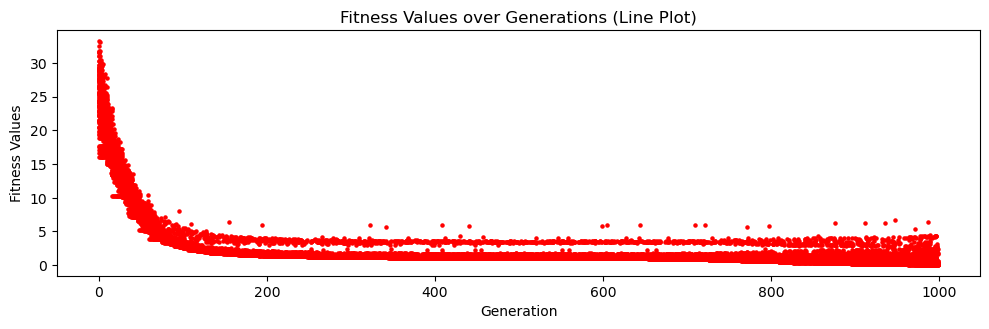

In [11]:
# class EGA(GA):
#     """
#     Elitist Genetic Algorithm
#     """
#     def __init__(self, func, n_dim,
#                  size_pop=50, max_iter=200,
#                  prob_mut=0.001, n_elitist=0,
#                  lb=-1, ub=1,
#                  constraint_eq=tuple(), constraint_ueq=tuple(),
#                  precision=1e-7, early_stop=None):
#         super().__init__(func, n_dim, size_pop, max_iter, prob_mut, lb, ub, constraint_eq, constraint_ueq, precision,
#                          early_stop)
#         self._n_elitist = int(n_elitist * size_pop) if isinstance(n_elitist, float) else n_elitist

#     def run(self, max_iter=None):
#         self.max_iter = max_iter or self.max_iter
#         best = []
#         for i in range(self.max_iter):
#             self.X = self.chrom2x(self.Chrom)
#             self.Y = self.x2y()
#             self.ranking()

#             # select elitists do not selection(), crossover() and mutation() and remove them from population provisionally.
#             idx_elitist = np.sort(self.Y.argsort()[0:self._n_elitist])
#             self.size_pop -= self._n_elitist
#             elitist_FitV = np.take(self.FitV, idx_elitist, axis=0)
#             self.FitV = np.delete(self.FitV, idx_elitist, axis=0)
#             elitist_Chrom = np.take(self.Chrom, idx_elitist, axis=0)
#             self.Chrom = np.delete(self.Chrom, idx_elitist, axis=0)

#             self.selection()
#             self.crossover()
#             self.mutation()

#             # add elitists back to next generation population.
#             idx_insert = np.array([idx_v - i for i, idx_v in enumerate(idx_elitist)])
#             self.size_pop += self._n_elitist
#             self.FitV = np.insert(self.FitV, idx_insert, elitist_FitV, axis=0)
#             self.Chrom = np.insert(self.Chrom, idx_insert, elitist_Chrom, axis=0)

#             # record the best ones
#             generation_best_index = self.FitV.argmax()
#             self.generation_best_X.append(self.X[generation_best_index, :])
#             self.generation_best_Y.append(self.Y[generation_best_index])
#             self.all_history_Y.append(self.Y)
#             self.all_history_FitV.append(self.FitV)

#             if self.early_stop:
#                 best.append(min(self.generation_best_Y))
#                 if len(best) >= self.early_stop:
#                     if best.count(min(best)) == len(best):
#                         break
#                     else:
#                         best.pop(0)

#         global_best_index = np.array(self.generation_best_Y).argmin()
#         self.best_x = self.generation_best_X[global_best_index]
#         self.best_y = self.func(np.array([self.best_x]))
#         return self.best_x, self.best_y

from sko.GA import EGA
from sko.GA import GA
import numpy as np
import matplotlib.pyplot as plt

def griewank(p):
    part1 = [np.square(x) / 4000 for x in p]
    part2 = [np.cos(x / np.sqrt(i + 1)) for i, x in enumerate(p)]
    return np.sum(part1) - np.prod(part2) + 1

def rosenbrock(p):
    n_dim = len(p)
    res = 0
    for i in range(n_dim - 1):
        res += 100 * np.square(p[i + 1] - np.square(p[i])) + np.square(p[i] - 1)
    return res

# Set up the Genetic Algorithm
ga = EGA(func=rosenbrock, n_dim=30, size_pop=100, max_iter=1000, n_elitist=50, prob_mut=0.001, lb=[-100]*30, ub=[100]*30, precision=1e-7)
ga = EGA(func=griewank, n_dim=30, size_pop=100, max_iter=1000, n_elitist=50, prob_mut=0.001, lb=[-100]*30, ub=[100]*30, precision=1e-7)


# Run the Genetic Algorithm
best_x, best_y = ga.run()
print('Best x:', best_x)
print('Best y:', best_y)
print('rosenbrock_result:', rosenbrock(best_x))
print('griewank_result:', griewank(best_x))

# Plot the results
Y_history = ga.all_history_Y

plt.figure(figsize=(10, 6))

# Subplot 1: All fitness values over generations (Scatter plot)
plt.subplot(2, 1, 1)
for i in range(len(Y_history)):
    plt.scatter([i]*len(Y_history[i]), Y_history[i], color='red', s=5)

plt.xlabel('Generation')
plt.ylabel('Fitness Values')
plt.title('Fitness Values over Generations (Scatter Plot)')

# Subplot 2: All fitness values over generations (Line plot)
# plt.subplot(2, 1, 2)
# for i in range(len(Y_history)):
#     plt.plot([i]*len(Y_history[i]), Y_history[i], 'r-', alpha=0.3)

# Overlay the best fitness value for each generation as a blue line
best_fitness_values = [min(y) for y in Y_history]
# plt.plot(rosenbrock(best_x), color='blue')
plt.plot(griewank(best_x), color='green')

plt.xlabel('Generation')
plt.ylabel('Fitness Values')
plt.title('Fitness Values over Generations (Line Plot)')

plt.tight_layout()
plt.show()


Best x: [ 17.63155904   9.63075613  41.21203988  16.85296889  37.96997719
   9.67755295  -0.34272871 -12.45882293   8.88971859  72.21713596]
Best y: [5.0628888e+08]
rosenbrock_result: 506288879.88150454


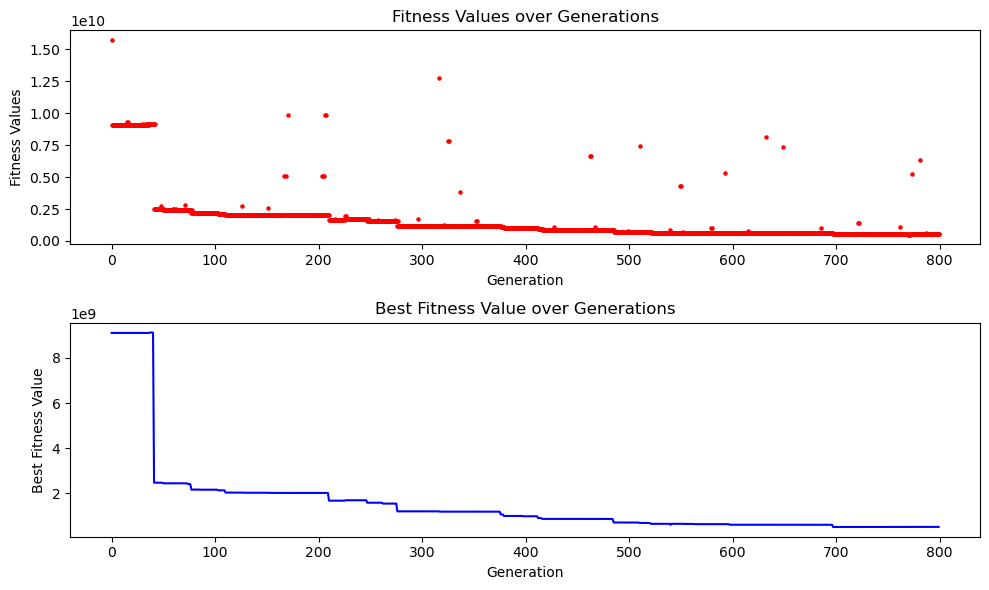

In [8]:
from sko.GA import GA
import numpy as np
import matplotlib.pyplot as plt

def griewank(p):
    part1 = [np.square(x) / 4000 for x in p]
    part2 = [np.cos(x / np.sqrt(i + 1)) for i, x in enumerate(p)]
    return np.sum(part1) - np.prod(part2) + 1

def rosenbrock(p):
    n_dim = len(p)
    res = 0
    for i in range(n_dim - 1):
        res += 100 * np.square(p[i + 1] - np.square(p[i])) + np.square(p[i] - 1)
    return res

# Set up the Genetic Algorithm
ga = GA(func=rosenbrock, n_dim=10, size_pop=2, max_iter=800, prob_mut=0.001, lb=[-100]*10, ub=[100]*10, precision=1e-7)

# Run the Genetic Algorithm
best_x, best_y = ga.run()
print('Best x:', best_x)
print('Best y:', best_y)
print('rosenbrock_result:', rosenbrock(best_x))

# Plot the results
Y_history = ga.all_history_Y

plt.figure(figsize=(10, 6))

# Subplot 1: All fitness values over generations
plt.subplot(2, 1, 1)
for i in range(len(Y_history)):
    # plt.scatter([i]*len(Y_history[i]), Y_history[i], color='red', s=5)
    plt.scatter([i]*len(Y_history[i]), Y_history[i], color='red', s=5)
    # plt.scatter([i]*len(Y_history[i]), Y_history[i], color='red', s=5)

plt.xlabel('Generation')
plt.ylabel('Fitness Values')
plt.title('Fitness Values over Generations')

# Subplot 2: Best fitness value in each generation

plt.subplot(2, 1, 2)
plt.plot([min(y) for y in Y_history], color='blue')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('Best Fitness Value over Generations')



plt.tight_layout()
plt.show()


Rosenbrock Best x: [ 1.0045555   1.00916256  1.01849684  1.03754117  1.07669444  1.15972855
  1.3457119   1.81217189  3.28665017 10.80493103]
Rosenbrock Best y: [6.04293598]
Rosenbrock result: 6.042935976057014
Griewank Best x: [-3.14002228e+00  4.43844334e+00 -5.43324617e+00  4.65661287e-08
 -4.65661287e-08 -4.65661287e-08  8.28287662e+00  8.85035727e+00
  9.38254851e+00 -4.65661287e-08]
Griewank Best y: [0.07376639]
Griewank result: 0.0737663926898271


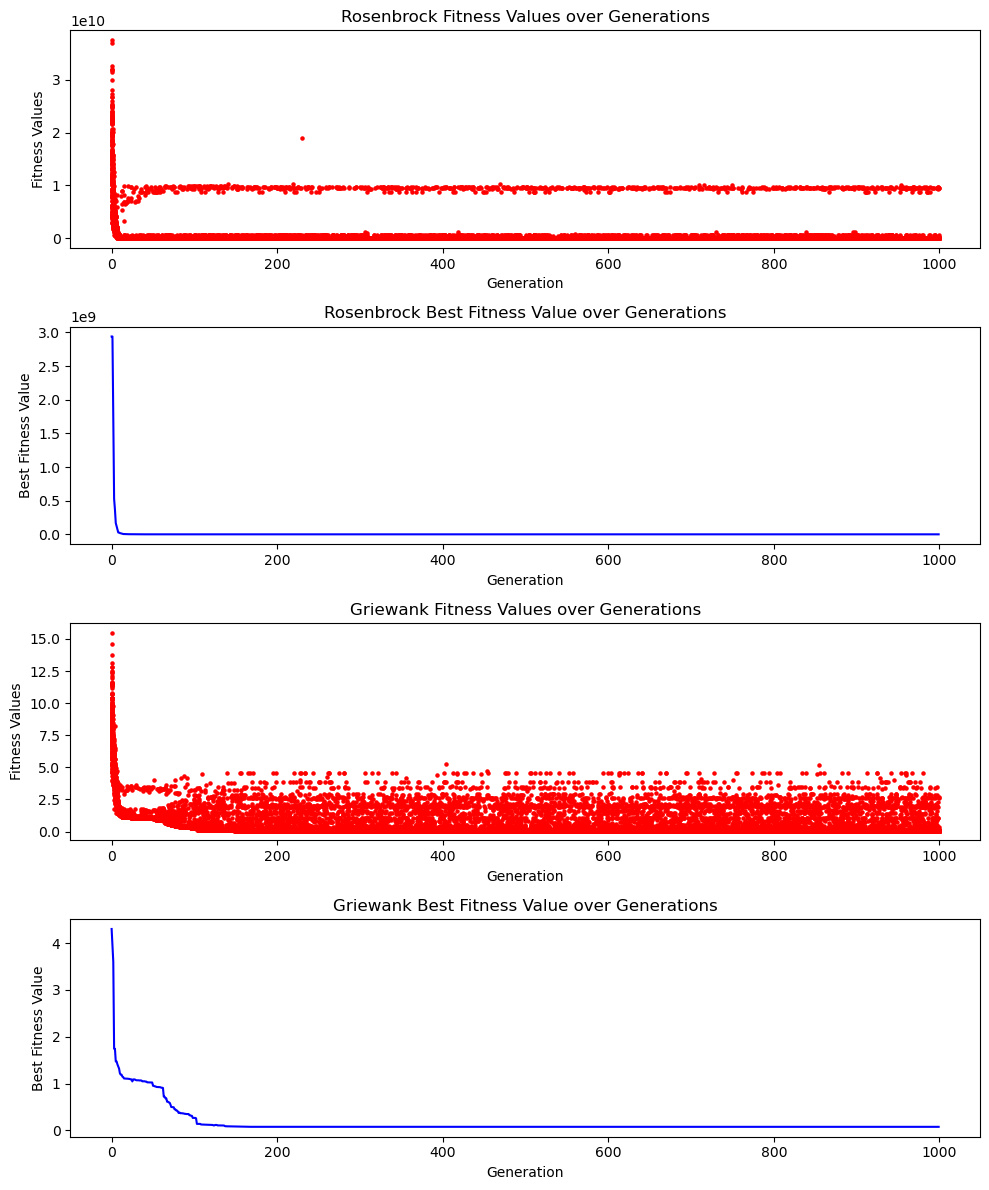

In [9]:
from sko.GA import GA
import numpy as np
import matplotlib.pyplot as plt

def griewank(p):
    part1 = [np.square(x) / 4000 for x in p]
    part2 = [np.cos(x / np.sqrt(i + 1)) for i, x in enumerate(p)]
    return np.sum(part1) - np.prod(part2) + 1

def rosenbrock(p):
    n_dim = len(p)
    res = 0
    for i in range(n_dim - 1):
        res += 100 * np.square(p[i + 1] - np.square(p[i])) + np.square(p[i] - 1)
    return res

# Set up the Genetic Algorithms
ga_rosenbrock = GA(func=rosenbrock, n_dim=10, size_pop=100, max_iter=1000, prob_mut=0.001, lb=[-100]*10, ub=[100]*10, precision=1e-7)
ga_griewank = GA(func=griewank, n_dim=10, size_pop=100, max_iter=1000, prob_mut=0.001, lb=[-100]*10, ub=[100]*10, precision=1e-7)

# Run the Genetic Algorithms
best_x_rosenbrock, best_y_rosenbrock = ga_rosenbrock.run()
best_x_griewank, best_y_griewank = ga_griewank.run()

print('Rosenbrock Best x:', best_x_rosenbrock)
print('Rosenbrock Best y:', best_y_rosenbrock)
print('Rosenbrock result:', rosenbrock(best_x_rosenbrock))

print('Griewank Best x:', best_x_griewank)
print('Griewank Best y:', best_y_griewank)
print('Griewank result:', griewank(best_x_griewank))

# Plot the results
Y_history_rosenbrock = ga_rosenbrock.all_history_Y
Y_history_griewank = ga_griewank.all_history_Y

plt.figure(figsize=(10, 12))

# Subplot 1: All fitness values over generations for Rosenbrock
plt.subplot(4, 1, 1)
for i in range(len(Y_history_rosenbrock)):
    plt.scatter([i]*len(Y_history_rosenbrock[i]), Y_history_rosenbrock[i], color='red', s=5)
plt.xlabel('Generation')
plt.ylabel('Fitness Values')
plt.title('Rosenbrock Fitness Values over Generations')

# Subplot 2: Best fitness value in each generation for Rosenbrock
plt.subplot(4, 1, 2)
plt.plot([min(y) for y in Y_history_rosenbrock], color='blue')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('Rosenbrock Best Fitness Value over Generations')

# Subplot 3: All fitness values over generations for Griewank
plt.subplot(4, 1, 3)
for i in range(len(Y_history_griewank)):
    plt.scatter([i]*len(Y_history_griewank[i]), Y_history_griewank[i], color='red', s=5)
plt.xlabel('Generation')
plt.ylabel('Fitness Values')
plt.title('Griewank Fitness Values over Generations')

# Subplot 4: Best fitness value in each generation for Griewank
plt.subplot(4, 1, 4)
plt.plot([min(y) for y in Y_history_griewank], color='blue')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('Griewank Best Fitness Value over Generations')

plt.tight_layout()
plt.show()


In [10]:
# from sko.GA import GA
# import numpy as np
# import matplotlib.pyplot as plt

# # Set up the Genetic Algorithm
# ga = GA(func=rosenbrock, n_dim=30, size_pop=100, max_iter=1000, prob_mut=0.001, lb=[-100]*30, ub=[100]*30, precision=1e-7)

# # Run the Genetic Algorithm
# best_x, best_y = ga.run()
# print('Best x:', best_x)
# print('Best y:', best_y)
# print('rosenbrock_result:', rosenbrock(best_x))

# # Plot the results
# Y_history = ga.all_history_Y

# plt.figure(figsize=(10, 6))



# # Subplot 1: All fitness values over generations
# plt.subplot(2, 1, 1)
# for i in range(len(Y_history)):
#     plt.scatter([i]*len(Y_history[i]), Y_history[i], color='red', s=5)

# plt.xlabel('Generation')
# plt.ylabel('Fitness Values')
# plt.title('Fitness Values over Generations')

# # Subplot 2: Best fitness value in each generation
# plt.subplot(2, 1, 2)
# plt.plot([min(y) for y in Y_history], color='blue')
# plt.xlabel('Generation')
# plt.ylabel('Best Fitness Value')
# plt.title('Best Fitness Value over Generations')

# plt.tight_layout()
# plt.show()


In [12]:
# from sko.GA import GA
# import numpy as np
# import matplotlib.pyplot as plt

# def griewank(p):
#     part1 = [np.square(x) / 4000 for x in p]
#     part2 = [np.cos(x / np.sqrt(i + 1)) for i, x in enumerate(p)]
#     return np.sum(part1) - np.prod(part2) + 1

# def rosenbrock(p):
#     n_dim = len(p)
#     res = 0
#     for i in range(n_dim - 1):
#         res += 100 * np.square(p[i + 1] - np.square(p[i])) + np.square(p[i] - 1)
#     return res

# # Set up the Genetic Algorithm
# ga = GA(func=rosenbrock, n_dim=30, size_pop=100, max_iter=1000, prob_mut=0.001, lb=[-100]*30, ub=[100]*30, precision=1e-7)

# # Run the Genetic Algorithm
# best_x, best_y = ga.run()
# print('Best x:', best_x)
# print('Best y:', best_y)
# print('rosenbrock_result:', rosenbrock(best_x))

# # Plot the results
# Y_history = ga.all_history_Y

# plt.figure(figsize=(12, 8))

# # Subplot 1: All Rosenbrock function values over generations (Scatter plot)
# plt.subplot(2, 1, 1)
# for i in range(len(Y_history)):
#     for y in Y_history[i]:
#         plt.scatter(i, y, color='red', s=5)
# plt.xlabel('Generation')
# plt.ylabel('Rosenbrock Function Values')
# plt.title('Rosenbrock Function Values over Generations (Scatter Plot)')

# # Subplot 2: All Rosenbrock function values over generations (Line plot)
# plt.subplot(2, 1, 2)
# for i in range(len(Y_history)):
#     for y in Y_history[i]:
#         plt.plot(i, y, 'r-', alpha=0.3)

# # Overlay the best Rosenbrock function value for each generation as a blue line
# best_rosenbrock_values = [min(y) for y in Y_history]
# plt.plot(best_rosenbrock_values, color='blue')

# plt.xlabel('Generation')
# plt.ylabel('Rosenbrock Function Values')
# plt.title('Rosenbrock Function Values over Generations (Line Plot)')

# plt.tight_layout()
# plt.show()


In [13]:
# from sko.GA import GA

# ga = GA(func=rosenbrock, n_dim=10, size_pop=50, max_iter=10000, prob_mut=0.001, lb=[-100]*10, ub=[100]*10, precision=1e-7)
# best_x, best_y = ga.run()
# print('best_x:', best_x, '\n', 'best_y:', best_y)

# import pandas as pd
# import matplotlib.pyplot as plt

# Y_history = pd.DataFrame(ga.all_history_Y)
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
# Y_history.min(axis=1).cummin().plot(kind='line')
# plt.show()

In [21]:
# from sko.SA import SA

# sa = SA(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
# best_x, best_y = sa.run()
# print('best_x:', best_x, 'best_y', best_y)

# import matplotlib.pyplot as plt
# import pandas as pd

# plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
# plt.show()


NameError: name 'demo_func' is not defined